In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from pandas.core.common import flatten

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
data_path = "/Users/massimilianoarca/Library/CloudStorage/OneDrive-PolitecnicodiMilano/Thames Ecoli/Data"

dir_store_path = os.path.join(data_path, "temporary results")

processed_dataset_path = os.path.join(dir_store_path, "processed_dataset.xlsx")

In [3]:
full_df = pd.read_excel(processed_dataset_path)

# Dataset Preprocessing

In [4]:
tntc_condition = (
    (full_df["Coliform (1ml)_mean"] == "TNTC")
    | (full_df["Ecoli (1ml)_mean"] == "TNTC")
    | (full_df["Coliform (1ml)_mean"] == 0)
)

In [5]:
tntc_df = full_df[tntc_condition]

In [6]:
clean_df = full_df.drop(tntc_df.index)

In [7]:
clean_df

,Unnamed: 0,index,DateTime,Site,Bottle,Sample,Technician Water Quality,Technician Counting,Temp C_mean,Ph_mean,Cond (ms)_mean,Coliform (1ml)_mean,Ecoli (1ml)_mean
0,16,16.0,2023-02-07 08:18:00,D,1,0,Randa,Randa,6.0,8.1,0.80,16,6
1,17,17.0,2023-02-07 08:18:00,D,2,0,Randa,Randa,6.0,8.2,0.77,10,6
2,28,28.0,2023-02-14 09:55:00,D,1,0,Randa,Randa,9.0,7.8,0.80,11,5
3,29,29.0,2023-02-14 09:55:00,D,2,0,Randa,Randa,8.0,8.0,0.80,22,7
4,40,40.0,2023-02-21 16:10:00,D,1,0,Randa,Randa,11.0,8.0,1.25,19,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,875,875.0,2023-09-04 14:06:00,D,2,2,NaN,Admin,21.9,7.8,1.46,35.5,3.5
254,884,884.0,2023-09-04 14:22:00,D,1,1,NaN,Admin,23.0,7.5,1.49,67.5,8
255,983,983.0,2023-09-05 14:15:00,D,1,1,NaN,Vee,23.9,7.6,1.46,34.5,8
256,984,984.0,2023-09-05 14:15:00,D,1,2,NaN,Vee,23.9,7.6,1.46,36.5,8.5


# Utils

In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import LeaveOneOut

In [9]:
import sklearn.metrics as metrics


def regression_results(y_true, y_pred):
    # Regression metrics
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)

    print("r2: ", round(r2, 4))
    print("MAE: ", round(mean_absolute_error, 4))
    print("MSE: ", round(mse, 4))
    print("RMSE: ", round(np.sqrt(mse), 4))

# Overall Ecoli Regression

In [10]:
ecoli_df = clean_df.drop(columns=["Coliform (1ml)_mean"])

In [11]:
ecoli_df

,Unnamed: 0,index,DateTime,Site,Bottle,Sample,Technician Water Quality,Technician Counting,Temp C_mean,Ph_mean,Cond (ms)_mean,Ecoli (1ml)_mean
0,16,16.0,2023-02-07 08:18:00,D,1,0,Randa,Randa,6.0,8.1,0.80,6
1,17,17.0,2023-02-07 08:18:00,D,2,0,Randa,Randa,6.0,8.2,0.77,6
2,28,28.0,2023-02-14 09:55:00,D,1,0,Randa,Randa,9.0,7.8,0.80,5
3,29,29.0,2023-02-14 09:55:00,D,2,0,Randa,Randa,8.0,8.0,0.80,7
4,40,40.0,2023-02-21 16:10:00,D,1,0,Randa,Randa,11.0,8.0,1.25,6
...,...,...,...,...,...,...,...,...,...,...,...,...
253,875,875.0,2023-09-04 14:06:00,D,2,2,NaN,Admin,21.9,7.8,1.46,3.5
254,884,884.0,2023-09-04 14:22:00,D,1,1,NaN,Admin,23.0,7.5,1.49,8
255,983,983.0,2023-09-05 14:15:00,D,1,1,NaN,Vee,23.9,7.6,1.46,8
256,984,984.0,2023-09-05 14:15:00,D,1,2,NaN,Vee,23.9,7.6,1.46,8.5


## One-at-a-time Relationship

### Temperature

In [12]:
temp_results = {}

In [13]:
X, y = ecoli_df["Temp C_mean"], ecoli_df["Ecoli (1ml)_mean"]

#### Linear Regression

In [14]:
# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
    # split data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # fit model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train.values.reshape(-1, 1), y_train)
    # evaluate model
    yhat = lin_reg.predict(X_test.values.reshape(-1, 1))
    # store
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
residuals = np.array(y_true) - np.array(y_pred)

temp_results["LinearRegression"] = {
    "mse": mse,
    "rmse": rmse,
    "r2": r2,
    "residuals": residuals,
    "y_pred": y_pred,
    "y_true": y_true,
}

#### Ridge Regression

In [15]:
# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
    # split data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # fit model
    ridge = Ridge()
    ridge.fit(X_train.values.reshape(-1, 1), y_train)
    # evaluate model
    yhat = ridge.predict(X_test.values.reshape(-1, 1))
    # store
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
residuals = np.array(y_true) - np.array(y_pred)

temp_results["Ridge"] = {
    "mse": mse,
    "rmse": rmse,
    "r2": r2,
    "residuals": residuals,
    "y_pred": y_pred,
    "y_true": y_true,
}

#### Lasso Regression

In [16]:
# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
    # split data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # fit model
    lasso = Lasso()
    lasso.fit(X_train.values.reshape(-1, 1), y_train)
    # evaluate model
    yhat = lasso.predict(X_test.values.reshape(-1, 1))
    # store
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
residuals = np.array(y_true) - np.array(y_pred)

temp_results["Lasso"] = {
    "mse": mse,
    "rmse": rmse,
    "r2": r2,
    "residuals": residuals,
    "y_pred": y_pred,
    "y_true": y_true,
}

#### Bayesian Linear Regression

In [17]:
# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
    # split data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # fit model
    bayeasian_ridge = BayesianRidge()
    bayeasian_ridge.fit(X_train.values.reshape(-1, 1), y_train)
    # evaluate model
    yhat = bayeasian_ridge.predict(X_test.values.reshape(-1, 1))
    # store
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
residuals = np.array(y_true) - np.array(y_pred)

temp_results["BayesianLinearRegression"] = {
    "mse": mse,
    "rmse": rmse,
    "r2": r2,
    "residuals": residuals,
    "y_pred": y_pred,
    "y_true": y_true,
}

#### Polynomial Regression

In [18]:
lin_reg = LinearRegression()

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X.values.reshape(-1, 1))
poly_features = pd.DataFrame(poly_features)

# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(poly_features):
    # split data
    X_train, X_test = (
        poly_features.iloc[train_ix, :],
        poly_features.iloc[test_ix, :],
    )
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # fit model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    # evaluate model
    yhat = lin_reg.predict(X_test)
    # store
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])


mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
residuals = np.array(y_true) - np.array(y_pred)

temp_results["PolynomialRegression"] = {
    "mse": mse,
    "rmse": rmse,
    "r2": r2,
    "residuals": residuals,
    "y_pred": y_pred,
    "y_true": y_true,
}

#### Temperature Results

In [19]:
rows = []

for model in temp_results.keys():
    row = {
        "Model": model,
        "MSE": temp_results[model]["mse"],
        "RMSE": temp_results[model]["rmse"],
        "R2": temp_results[model]["r2"],
        "Residuals": temp_results[model]["residuals"],
        "y_pred": temp_results[model]["y_pred"],
        "y_true": temp_results[model]["y_true"],
    }
    rows.append(row)

df_results = pd.DataFrame(rows)

In [20]:
for model in df_results["Model"].unique():
    print("MODEL:", model)
    y_test = df_results[df_results["Model"] == model]["y_true"].values[0]
    y_pred = df_results[df_results["Model"] == model]["y_pred"].values[0]
    regression_results(y_test, y_pred)
    print()

MODEL: LinearRegression
r2:  -0.0079
MAE:  10.9901
MSE:  337.2447
RMSE:  18.3642

MODEL: Ridge
r2:  -0.0079
MAE:  10.9901
MSE:  337.2446
RMSE:  18.3642

MODEL: Lasso
r2:  -0.0082
MAE:  10.9742
MSE:  337.3363
RMSE:  18.3667

MODEL: BayesianLinearRegression
r2:  -0.0078
MAE:  10.9425
MSE:  337.2075
RMSE:  18.3632

MODEL: PolynomialRegression
r2:  -0.0087
MAE:  11.0745
MSE:  337.5091
RMSE:  18.3714



##### Estimated Functions

In [21]:
%% script false --no-raise-error

# plot each estimated function and the real data points for each site
for model in df_results["Model"].unique():
    if model == "PolynomialRegression":
        result_model_site = df_results[df_results["Model"] == model]

        coefficients = result_model_site["Coefficients"].values[0]
        intercept = result_model_site["Intercept"].values[0]

        x_est = np.linspace(0, 30, 100)
        y_est = intercept + coefficients[0] * x_est + coefficients[1] * x_est ** 2

        plt.plot(x_est, y_est, label=model)
        plt.scatter(X, y, label="Real Data")
        plt.xlabel("Temperature")
        plt.ylabel("Ecoli")
        plt.title(f"{model}")
    else:
        result_model_site = df_results[df_results["Model"] == model]

        coefficients = result_model_site["Coefficients"].values[0]
        intercept = result_model_site["Intercept"].values[0]

        x_est = np.linspace(0, 30, 100)
        y_est = intercept + coefficients[0] * x_est

        plt.plot(x_est, y_est, label=model)
        plt.scatter(X, y, label="Real Data")
        plt.xlabel("Temperature")
        plt.ylabel("Ecoli")
        plt.title(f"{model}")
    plt.show()
    print()

UsageError: Cell magic `%%` not found.


##### Residuals

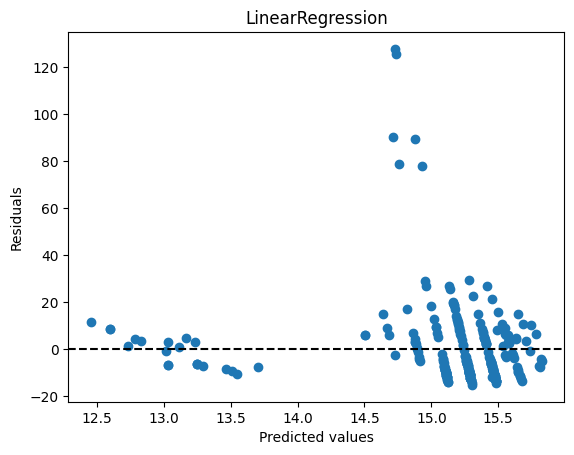

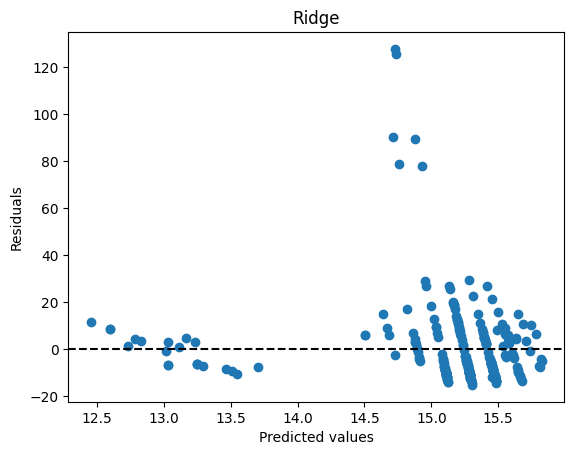

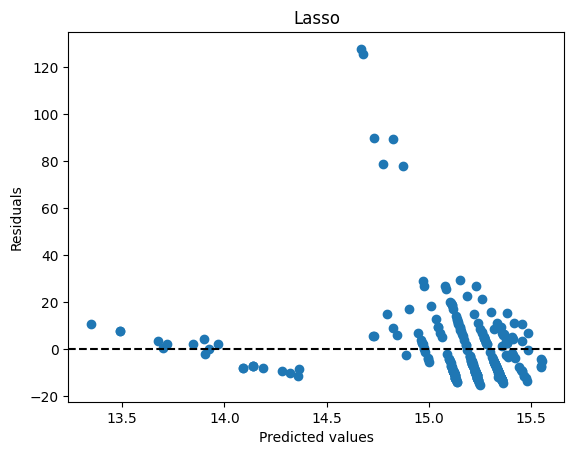

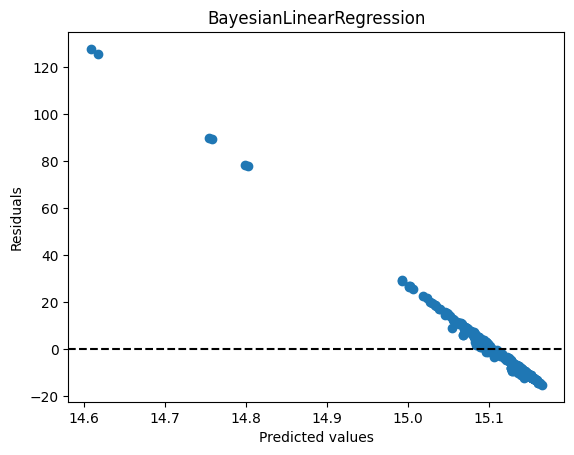

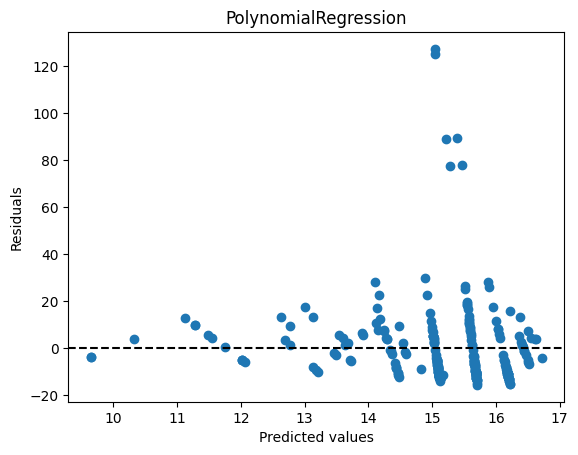

In [22]:
for model in df_results["Model"].unique():
    df_model = df_results[df_results["Model"] == model]
    y_pred = df_model["y_pred"].values[0]
    residuals = df_model["Residuals"].values[0]
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0.0, color="black", linestyle="--")
    plt.title(f"{model}")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.show()

##### Predicted vs Actual

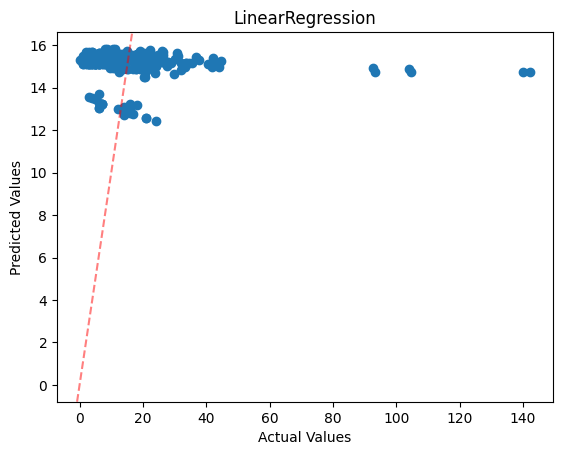

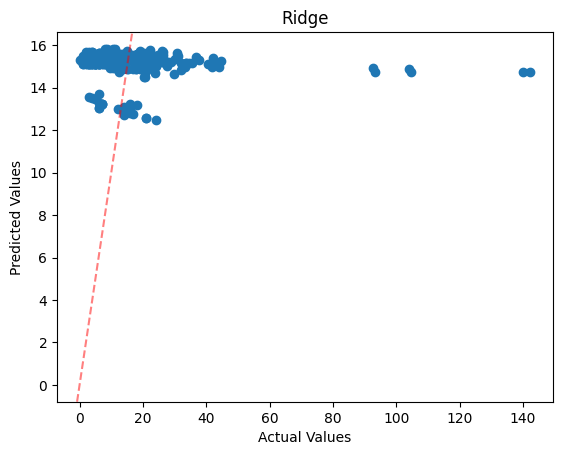

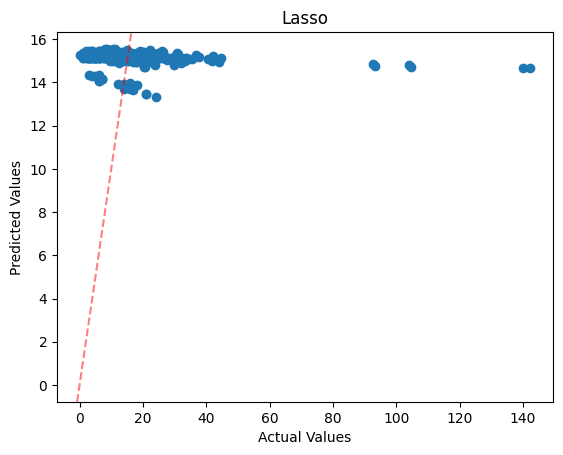

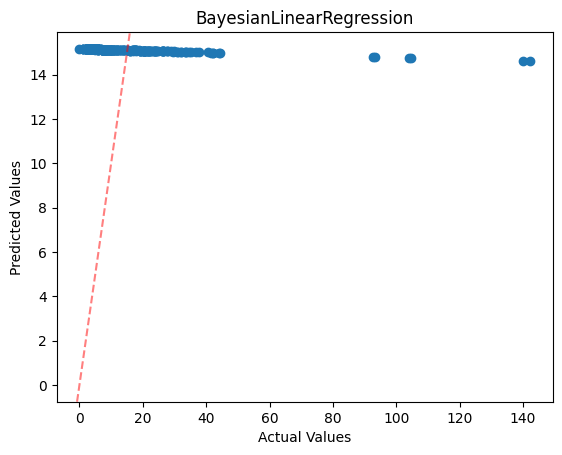

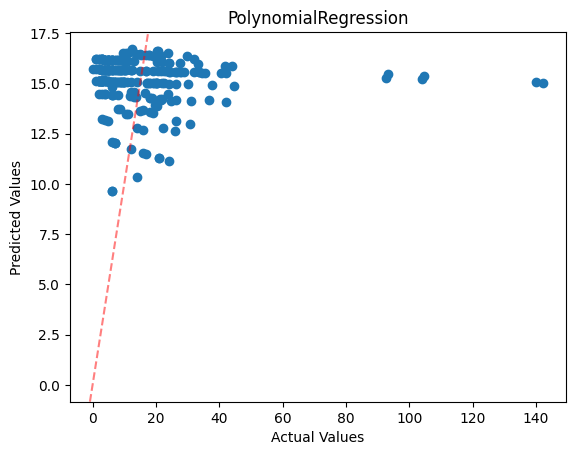

In [23]:
for model in df_results["Model"].unique():
    y_test = df_results[df_results["Model"] == model]["y_true"].values[0]
    y_pred = df_results[df_results["Model"] == model]["y_pred"].values[0]

    plt.scatter(y_test, y_pred)
    plt.axline([0, 0], [1, 1], color="red", linestyle="--", alpha=0.5)
    plt.title(f"{model}")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.show()

### pH

In [24]:
ph_results = {}

In [25]:
X, y = ecoli_df["Ph_mean"], ecoli_df["Ecoli (1ml)_mean"]

#### Linear Regression

In [26]:
# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
    # split data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # fit model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train.values.reshape(-1, 1), y_train)
    # evaluate model
    yhat = lin_reg.predict(X_test.values.reshape(-1, 1))
    # store
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
residuals = np.array(y_true) - np.array(y_pred)

ph_results["LinearRegression"] = {
    "mse": mse,
    "rmse": rmse,
    "r2": r2,
    "residuals": residuals,
    "y_pred": y_pred,
    "y_true": y_true,
}

#### Ridge Regression

In [27]:
# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
    # split data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # fit model
    ridge = Ridge()
    ridge.fit(X_train.values.reshape(-1, 1), y_train)
    # evaluate model
    yhat = ridge.predict(X_test.values.reshape(-1, 1))
    # store
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
residuals = np.array(y_true) - np.array(y_pred)

ph_results["Ridge"] = {
    "mse": mse,
    "rmse": rmse,
    "r2": r2,
    "residuals": residuals,
    "y_pred": y_pred,
    "y_true": y_true,
}

#### Lasso Regression

In [28]:
# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
    # split data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # fit model
    lasso = Lasso()
    lasso.fit(X_train.values.reshape(-1, 1), y_train)
    # evaluate model
    yhat = lasso.predict(X_test.values.reshape(-1, 1))
    # store
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
residuals = np.array(y_true) - np.array(y_pred)

ph_results["Lasso"] = {
    "mse": mse,
    "rmse": rmse,
    "r2": r2,
    "residuals": residuals,
    "y_pred": y_pred,
    "y_true": y_true,
}

#### Bayesian Linear Regression

In [29]:
# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
    # split data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # fit model
    bayeasian_ridge = BayesianRidge()
    bayeasian_ridge.fit(X_train.values.reshape(-1, 1), y_train)
    # evaluate model
    yhat = bayeasian_ridge.predict(X_test.values.reshape(-1, 1))
    # store
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
residuals = np.array(y_true) - np.array(y_pred)

ph_results["BayesianLinearRegression"] = {
    "mse": mse,
    "rmse": rmse,
    "r2": r2,
    "residuals": residuals,
    "y_pred": y_pred,
    "y_true": y_true,
}

#### Polynomial Regression

In [30]:
lin_reg = LinearRegression()

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X.values.reshape(-1, 1))
poly_features = pd.DataFrame(poly_features)

# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(poly_features):
    # split data
    X_train, X_test = (
        poly_features.iloc[train_ix, :],
        poly_features.iloc[test_ix, :],
    )
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # fit model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    # evaluate model
    yhat = lin_reg.predict(X_test)
    # store
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])


mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
residuals = np.array(y_true) - np.array(y_pred)

ph_results["PolynomialRegression"] = {
    "mse": mse,
    "rmse": rmse,
    "r2": r2,
    "residuals": residuals,
    "y_pred": y_pred,
    "y_true": y_true,
}

#### pH Results

In [31]:
rows = []

for model in ph_results.keys():
    row = {
        "Model": model,
        "MSE": ph_results[model]["mse"],
        "RMSE": ph_results[model]["rmse"],
        "R2": ph_results[model]["r2"],
        "Residuals": ph_results[model]["residuals"],
        "y_pred": ph_results[model]["y_pred"],
        "y_true": ph_results[model]["y_true"],
    }
    rows.append(row)

df_results = pd.DataFrame(rows)

In [32]:
for model in df_results["Model"].unique():
    print("MODEL:", model)
    y_test = df_results[df_results["Model"] == model]["y_true"].values[0]
    y_pred = df_results[df_results["Model"] == model]["y_pred"].values[0]
    regression_results(y_test, y_pred)
    print()

MODEL: LinearRegression
r2:  0.0811
MAE:  10.5223
MSE:  307.4408
RMSE:  17.534

MODEL: Ridge
r2:  0.0798
MAE:  10.4136
MSE:  307.8982
RMSE:  17.547

MODEL: Lasso
r2:  -0.0078
MAE:  10.9423
MSE:  337.2092
RMSE:  18.3633

MODEL: BayesianLinearRegression
r2:  0.0811
MAE:  10.4988
MSE:  307.4594
RMSE:  17.5345

MODEL: PolynomialRegression
r2:  0.0915
MAE:  10.3421
MSE:  303.9847
RMSE:  17.4352



##### Estimated Functions

In [33]:
%% script false --no-raise-error

# plot each estimated function and the real data points for each site
for model in df_results["Model"].unique():
    if model == "PolynomialRegression":
        result_model_site = df_results[df_results["Model"] == model]

        coefficients = result_model_site["Coefficients"].values[0]
        intercept = result_model_site["Intercept"].values[0]

        x_est = np.linspace(0, 30, 100)
        y_est = intercept + coefficients[0] * x_est + coefficients[1] * x_est ** 2

        plt.plot(x_est, y_est, label=model)
        plt.scatter(X, y, label="Real Data")
        plt.xlabel("pH")
        plt.ylabel("Ecoli")
        plt.title(f"{model}")
    else:
        result_model_site = df_results[df_results["Model"] == model]

        coefficients = result_model_site["Coefficients"].values[0]
        intercept = result_model_site["Intercept"].values[0]

        x_est = np.linspace(0, 30, 100)
        y_est = intercept + coefficients[0] * x_est

        plt.plot(x_est, y_est, label=model)
        plt.scatter(X, y, label="Real Data")
        plt.xlabel("pH")
        plt.ylabel("Ecoli")
        plt.title(f"{model}")
    plt.show()
    print()

UsageError: Cell magic `%%` not found.


##### Residuals

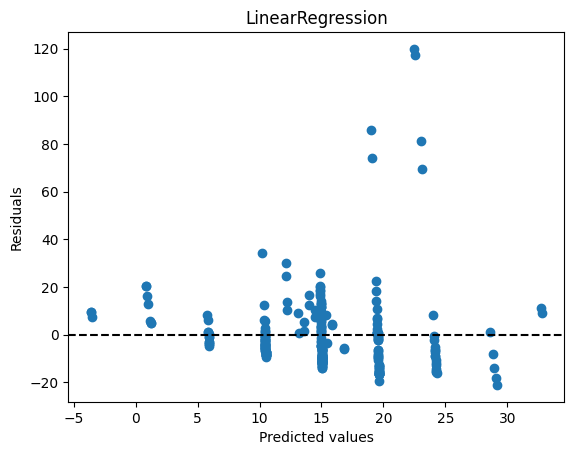

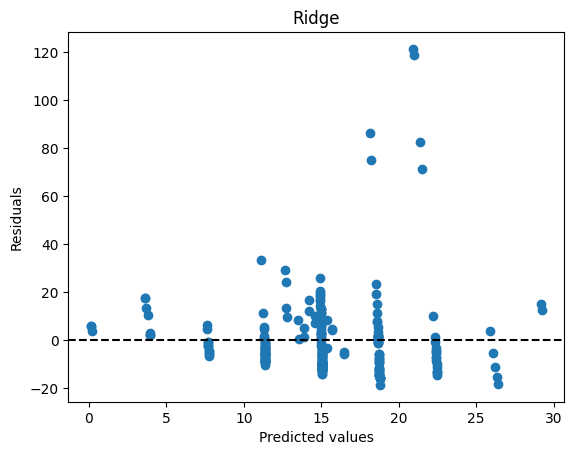

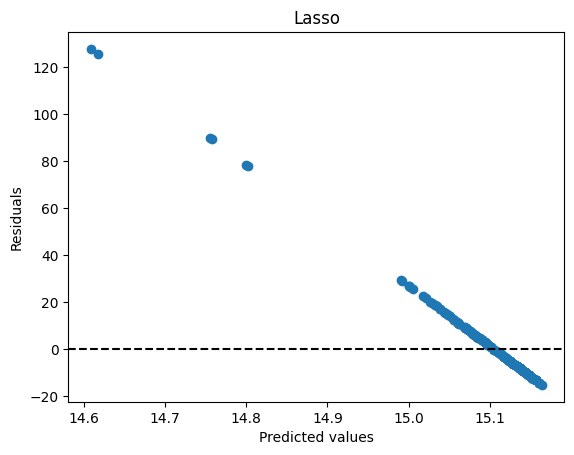

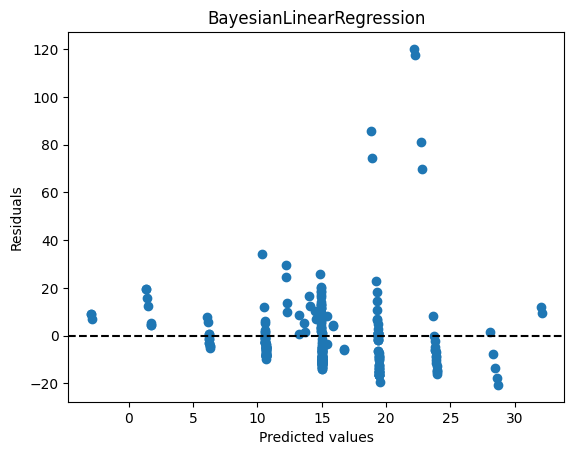

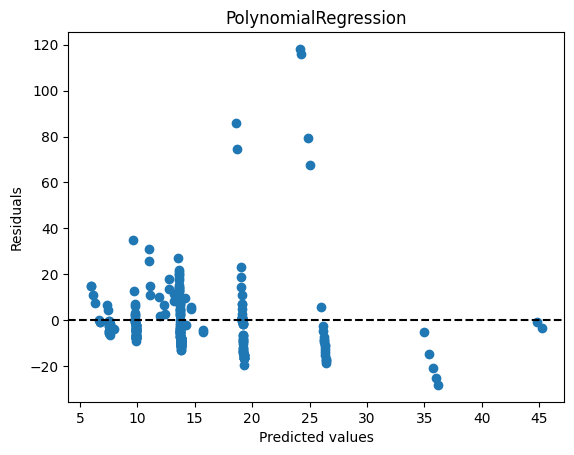

In [34]:
for model in df_results["Model"].unique():
    df_model = df_results[df_results["Model"] == model]
    y_pred = df_model["y_pred"].values[0]
    residuals = df_model["Residuals"].values[0]
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0.0, color="black", linestyle="--")
    plt.title(f"{model}")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.show()

##### Predicted vs Actual

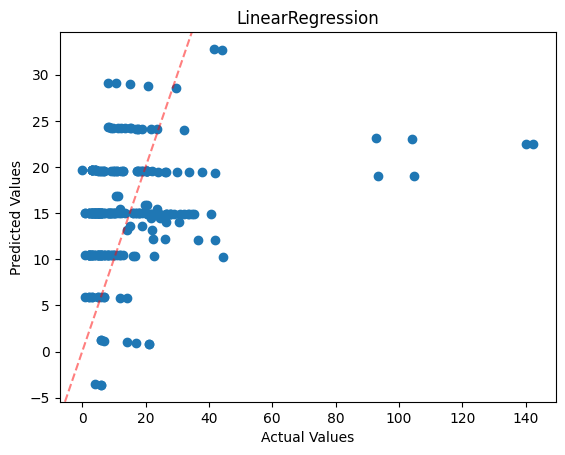

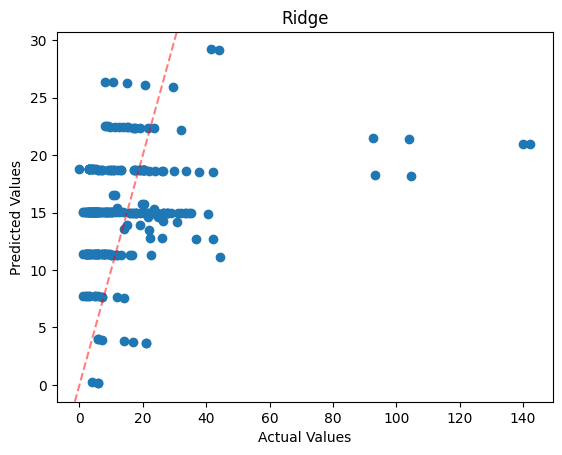

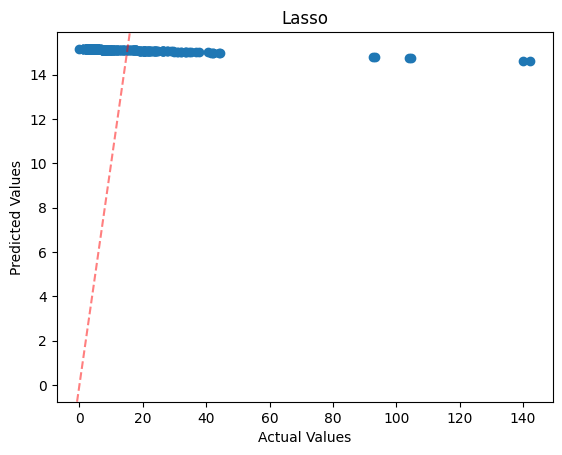

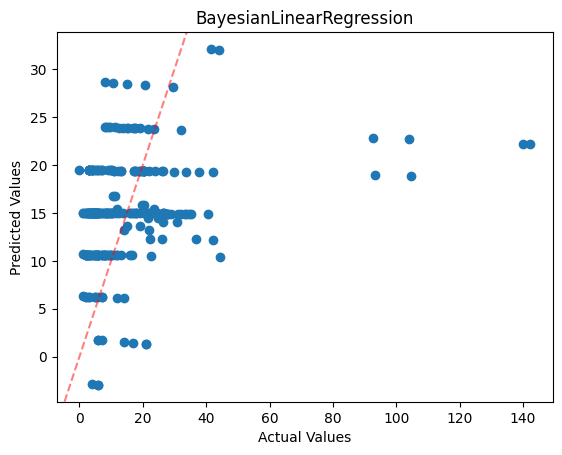

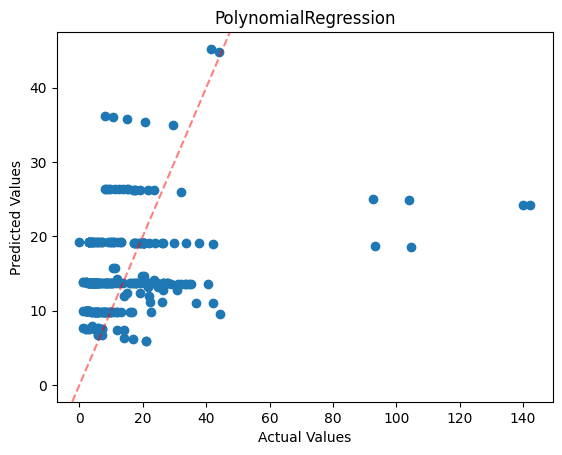

In [35]:
for model in df_results["Model"].unique():
    y_test = df_results[df_results["Model"] == model]["y_true"].values[0]
    y_pred = df_results[df_results["Model"] == model]["y_pred"].values[0]

    plt.scatter(y_test, y_pred)
    plt.axline([0, 0], [1, 1], color="red", linestyle="--", alpha=0.5)
    plt.title(f"{model}")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.show()

### Cond (ms)

In [36]:
cond_results = {}

In [37]:
X, y = ecoli_df["Cond (ms)_mean"], ecoli_df["Ecoli (1ml)_mean"]

#### Linear Regression

In [38]:
# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
    # split data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # fit model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train.values.reshape(-1, 1), y_train)
    # evaluate model
    yhat = lin_reg.predict(X_test.values.reshape(-1, 1))
    # store
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
residuals = np.array(y_true) - np.array(y_pred)

cond_results["LinearRegression"] = {
    "mse": mse,
    "rmse": rmse,
    "r2": r2,
    "residuals": residuals,
    "y_pred": y_pred,
    "y_true": y_true,
}

#### Ridge Regression

In [39]:
# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
    # split data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # fit model
    ridge = Ridge()
    ridge.fit(X_train.values.reshape(-1, 1), y_train)
    # evaluate model
    yhat = ridge.predict(X_test.values.reshape(-1, 1))
    # store
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
residuals = np.array(y_true) - np.array(y_pred)

cond_results["Ridge"] = {
    "mse": mse,
    "rmse": rmse,
    "r2": r2,
    "residuals": residuals,
    "y_pred": y_pred,
    "y_true": y_true,
}

#### Lasso Regression

In [40]:
# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
    # split data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # fit model
    lasso = Lasso()
    lasso.fit(X_train.values.reshape(-1, 1), y_train)
    # evaluate model
    yhat = lasso.predict(X_test.values.reshape(-1, 1))
    # store
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
residuals = np.array(y_true) - np.array(y_pred)

cond_results["Lasso"] = {
    "mse": mse,
    "rmse": rmse,
    "r2": r2,
    "residuals": residuals,
    "y_pred": y_pred,
    "y_true": y_true,
}

#### Bayesian Linear Regression

In [41]:
# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
    # split data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # fit model
    bayeasian_ridge = BayesianRidge()
    bayeasian_ridge.fit(X_train.values.reshape(-1, 1), y_train)
    # evaluate model
    yhat = bayeasian_ridge.predict(X_test.values.reshape(-1, 1))
    # store
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
residuals = np.array(y_true) - np.array(y_pred)

cond_results["BayesianLinearRegression"] = {
    "mse": mse,
    "rmse": rmse,
    "r2": r2,
    "residuals": residuals,
    "y_pred": y_pred,
    "y_true": y_true,
}

#### Polynomial Regression

In [42]:
lin_reg = LinearRegression()

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X.values.reshape(-1, 1))
poly_features = pd.DataFrame(poly_features)

# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(poly_features):
    # split data
    X_train, X_test = (
        poly_features.iloc[train_ix, :],
        poly_features.iloc[test_ix, :],
    )
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # fit model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    # evaluate model
    yhat = lin_reg.predict(X_test)
    # store
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])


mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
residuals = np.array(y_true) - np.array(y_pred)

cond_results["PolynomialRegression"] = {
    "mse": mse,
    "rmse": rmse,
    "r2": r2,
    "residuals": residuals,
    "y_pred": y_pred,
    "y_true": y_true,
}

#### Cond (ms) Results

In [43]:
rows = []

for model in cond_results.keys():
    row = {
        "Model": model,
        "MSE": cond_results[model]["mse"],
        "RMSE": cond_results[model]["rmse"],
        "R2": cond_results[model]["r2"],
        "Residuals": cond_results[model]["residuals"],
        "y_pred": cond_results[model]["y_pred"],
        "y_true": cond_results[model]["y_true"],
    }
    rows.append(row)

df_results = pd.DataFrame(rows)

In [44]:
for model in df_results["Model"].unique():
    print("MODEL:", model)
    y_test = df_results[df_results["Model"] == model]["y_true"].values[0]
    y_pred = df_results[df_results["Model"] == model]["y_pred"].values[0]
    regression_results(y_test, y_pred)
    print()

MODEL: LinearRegression
r2:  -0.0138
MAE:  10.9378
MSE:  339.2056
RMSE:  18.4175

MODEL: Ridge
r2:  -0.0136
MAE:  10.9371
MSE:  339.1531
RMSE:  18.4161

MODEL: Lasso
r2:  -0.0078
MAE:  10.9423
MSE:  337.2092
RMSE:  18.3633

MODEL: BayesianLinearRegression
r2:  -0.0195
MAE:  10.9889
MSE:  341.0982
RMSE:  18.4688

MODEL: PolynomialRegression
r2:  0.0012
MAE:  10.7504
MSE:  334.1851
RMSE:  18.2807



##### Estimated Functions

In [45]:
%% script false --no-raise-error

# plot each estimated function and the real data points for each site
for model in df_results["Model"].unique():
    if model == "PolynomialRegression":
        result_model_site = df_results[df_results["Model"] == model]

        coefficients = result_model_site["Coefficients"].values[0]
        intercept = result_model_site["Intercept"].values[0]

        x_est = np.linspace(0, 30, 100)
        y_est = intercept + coefficients[0] * x_est + coefficients[1] * x_est ** 2

        plt.plot(x_est, y_est, label=model)
        plt.scatter(X, y, label="Real Data")
        plt.xlabel("Cond (ms)")
        plt.ylabel("Ecoli")
        plt.title(f"{model}")
    else:
        result_model_site = df_results[df_results["Model"] == model]

        coefficients = result_model_site["Coefficients"].values[0]
        intercept = result_model_site["Intercept"].values[0]

        x_est = np.linspace(0, 30, 100)
        y_est = intercept + coefficients[0] * x_est

        plt.plot(x_est, y_est, label=model)
        plt.scatter(X, y, label="Real Data")
        plt.xlabel("Cond (ms)")
        plt.ylabel("Ecoli")
        plt.title(f"{model}")
    plt.show()
    print()

UsageError: Cell magic `%%` not found.


##### Residuals

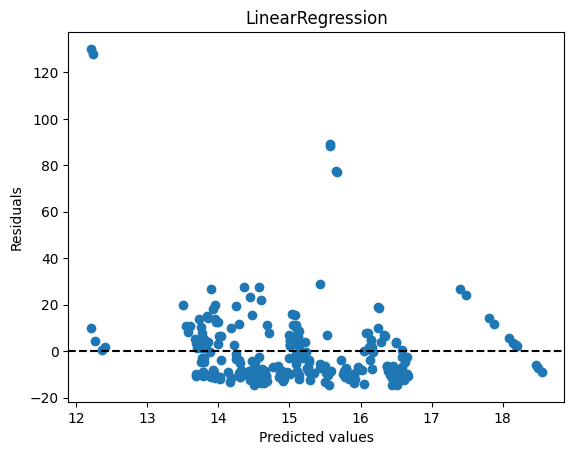

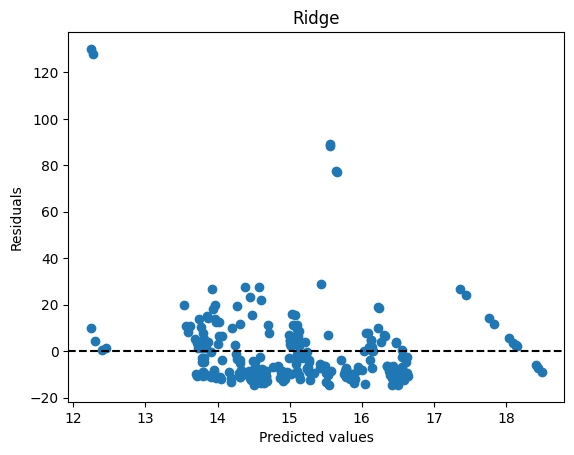

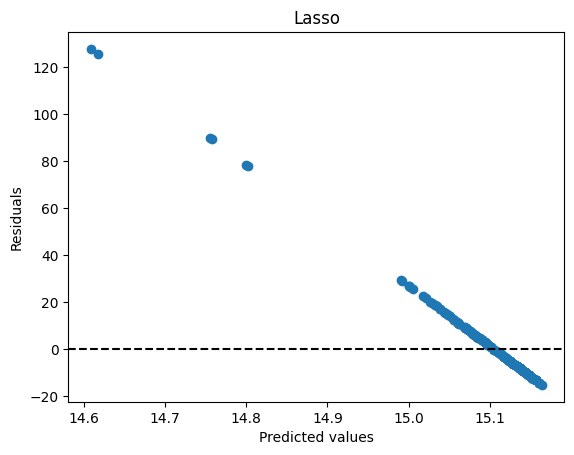

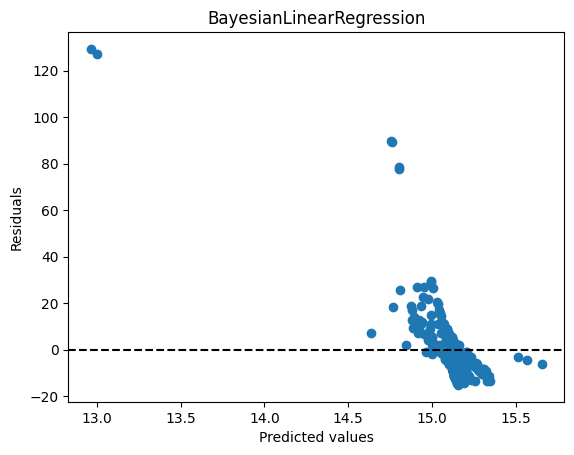

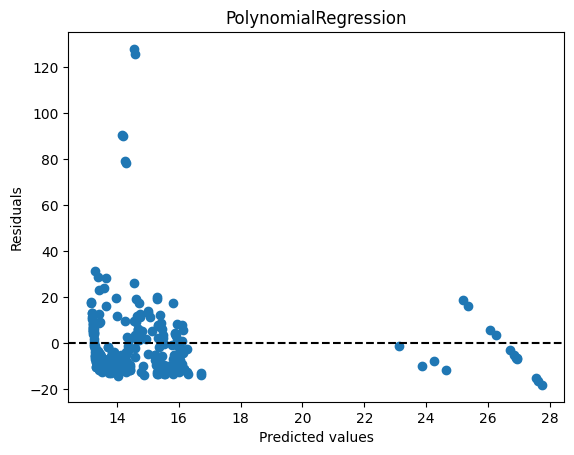

In [46]:
for model in df_results["Model"].unique():
    df_model = df_results[df_results["Model"] == model]
    y_pred = df_model["y_pred"].values[0]
    residuals = df_model["Residuals"].values[0]
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0.0, color="black", linestyle="--")
    plt.title(f"{model}")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.show()

##### Predicted vs Actual

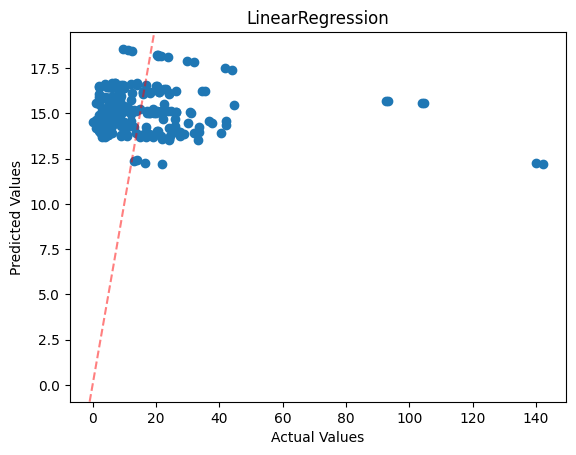

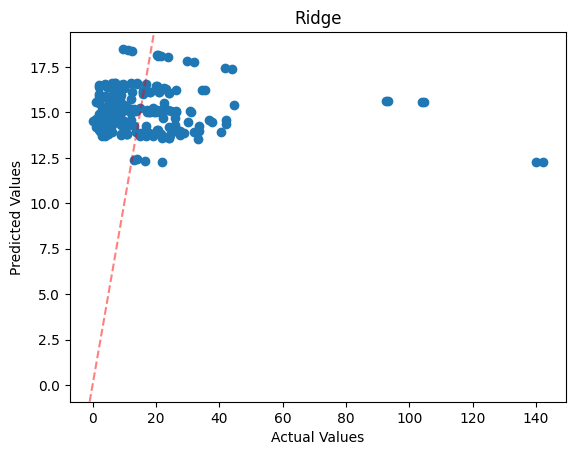

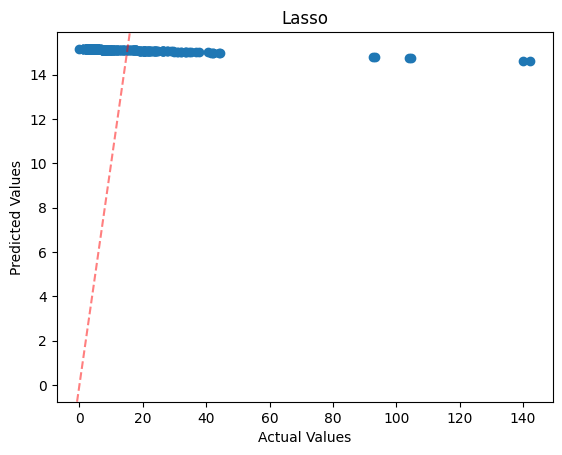

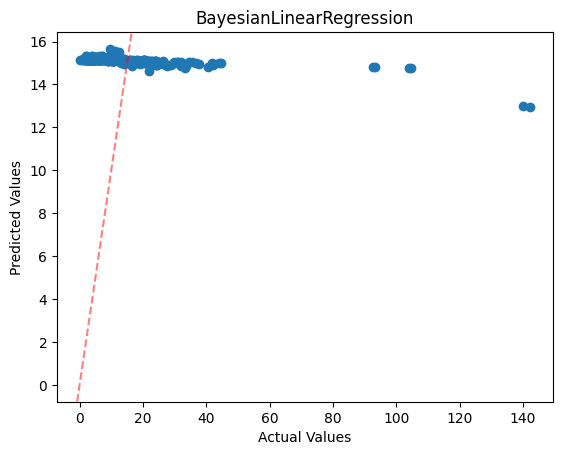

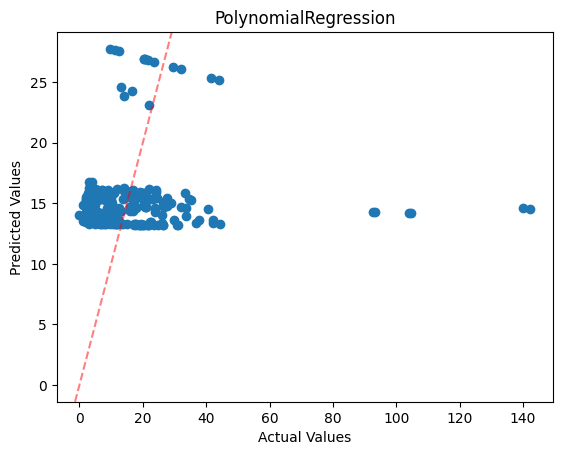

In [47]:
for model in df_results["Model"].unique():
    y_test = df_results[df_results["Model"] == model]["y_true"].values[0]
    y_pred = df_results[df_results["Model"] == model]["y_pred"].values[0]

    plt.scatter(y_test, y_pred)
    plt.axline([0, 0], [1, 1], color="red", linestyle="--", alpha=0.5)
    plt.title(f"{model}")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.show()

## Overall Relationship

In [48]:
results = {}

In [49]:
X, y = (
    ecoli_df.drop(columns=["Ecoli (1ml)_mean"]),
    ecoli_df["Ecoli (1ml)_mean"],
)
X = X[["Temp C_mean", "Ph_mean", "Cond (ms)_mean"]]

### Linear Regression

In [50]:
# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
    # split data
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # fit model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    # evaluate model
    yhat = lin_reg.predict(X_test)
    # store
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
residuals = np.array(y_true) - np.array(y_pred)

results["LinearRegression"] = {
    "mse": mse,
    "rmse": rmse,
    "r2": r2,
    "residuals": residuals,
    "y_pred": y_pred,
    "y_true": y_true,
}

### Ridge

In [51]:
# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
    # split data
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # fit model
    ridge = Ridge()
    ridge.fit(X_train, y_train)
    # evaluate model
    yhat = ridge.predict(X_test)
    # store
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
residuals = np.array(y_true) - np.array(y_pred)

results["Ridge"] = {
    "mse": mse,
    "rmse": rmse,
    "r2": r2,
    "residuals": residuals,
    "y_pred": y_pred,
    "y_true": y_true,
}

### Lasso

In [52]:
# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
    # split data
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # fit model
    lasso = Lasso()
    lasso.fit(X_train, y_train)
    # evaluate model
    yhat = lasso.predict(X_test)
    # store
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
residuals = np.array(y_true) - np.array(y_pred)

results["Lasso"] = {
    "mse": mse,
    "rmse": rmse,
    "r2": r2,
    "residuals": residuals,
    "y_pred": y_pred,
    "y_true": y_true,
}

### Bayesian Linear Regression

In [53]:
# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
    # split data
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # fit model
    bayesian_ridge = BayesianRidge()
    bayesian_ridge.fit(X_train, y_train)
    # evaluate model
    yhat = bayesian_ridge.predict(X_test)
    # store
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
residuals = np.array(y_true) - np.array(y_pred)

results["BayesianLinearRegression"] = {
    "mse": mse,
    "rmse": rmse,
    "r2": r2,
    "residuals": residuals,
    "y_pred": y_pred,
    "y_true": y_true,
}

### Polynomial Regression

In [54]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
poly_features = pd.DataFrame(poly_features)

cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(poly_features):
    # split data
    X_train, X_test = (
        poly_features.iloc[train_ix, :],
        poly_features.iloc[test_ix, :],
    )
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # fit model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    # evaluate model
    yhat = lin_reg.predict(X_test)
    # store
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
residuals = np.array(y_true) - np.array(y_pred)

results["PolynomialRegression"] = {
    "mse": mse,
    "rmse": rmse,
    "r2": r2,
    "residuals": residuals,
    "y_pred": y_pred,
    "y_true": y_true,
}

### Results

In [55]:
rows = []

for model in results.keys():
    row = {
        "Model": model,
        "MSE": results[model]["mse"],
        "R2": results[model]["r2"],
        "Residuals": results[model]["residuals"],
        "y_pred": results[model]["y_pred"],
        "y_true": results[model]["y_true"],
    }
    rows.append(row)

df_results = pd.DataFrame(rows)

In [56]:
df_results

,Model,MSE,R2,Residuals,y_pred,y_true
0,LinearRegression,309.931091,0.073699,"[0.9106239612474383, 6.055107513373571, -14.25...","[5.089376038752562, -0.05510751337357078, 19.2...","[6, 6, 5, 7, 6, 3, 4, 18, 16, 21, 21, 16, 24, ..."
1,Ridge,310.300735,0.072594,"[-0.7479049095610435, 3.243922636538457, -13.0...","[6.7479049095610435, 2.756077363461543, 18.051...","[6, 6, 5, 7, 6, 3, 4, 18, 16, 21, 21, 16, 24, ..."
2,Lasso,337.336268,-0.008208,"[-8.08839581119052, -8.08839581119052, -9.2810...","[14.08839581119052, 14.08839581119052, 14.2810...","[6, 6, 5, 7, 6, 3, 4, 18, 16, 21, 21, 16, 24, ..."
3,BayesianLinearRegression,337.207473,-0.007823,"[-9.129596561855765, -9.129589277538845, -10.1...","[15.129596561855765, 15.129589277538845, 15.13...","[6, 6, 5, 7, 6, 3, 4, 18, 16, 21, 21, 16, 24, ..."
4,PolynomialRegression,316.472737,0.054148,"[-8.44406187763525, -10.829207525859147, -8.70...","[14.44406187763525, 16.829207525859147, 13.700...","[6, 6, 5, 7, 6, 3, 4, 18, 16, 21, 21, 16, 24, ..."


In [57]:
for model in df_results["Model"].unique():
    print("MODEL:", model)
    y_test = df_results[df_results["Model"] == model]["y_true"].values[0]
    y_pred = df_results[df_results["Model"] == model]["y_pred"].values[0]
    regression_results(y_test, y_pred)
    print()

MODEL: LinearRegression
r2:  0.0737
MAE:  10.4777
MSE:  309.9311
RMSE:  17.6049

MODEL: Ridge
r2:  0.0726
MAE:  10.3602
MSE:  310.3007
RMSE:  17.6154

MODEL: Lasso
r2:  -0.0082
MAE:  10.9742
MSE:  337.3363
RMSE:  18.3667

MODEL: BayesianLinearRegression
r2:  -0.0078
MAE:  10.9425
MSE:  337.2075
RMSE:  18.3632

MODEL: PolynomialRegression
r2:  0.0541
MAE:  10.3417
MSE:  316.4727
RMSE:  17.7897



#### Coefficients plots

In [58]:
%% script false --no-raise-error

for model in df_results["Model"].unique():
    df_model = df_results[df_results["Model"] == model]
    x_axis = range(len(df_model["Coefficients"].values[0]))
    plt.figure(figsize=(5, 2))
    plt.bar(x_axis, df_model["Coefficients"].values[0])
    plt.title(f"{model}")
    plt.show()

UsageError: Cell magic `%%` not found.


#### Residuals

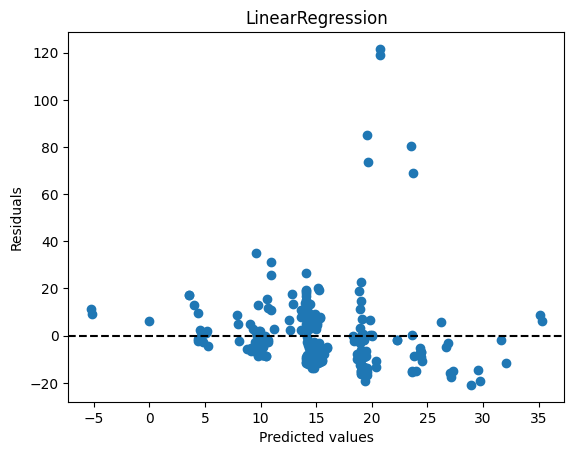

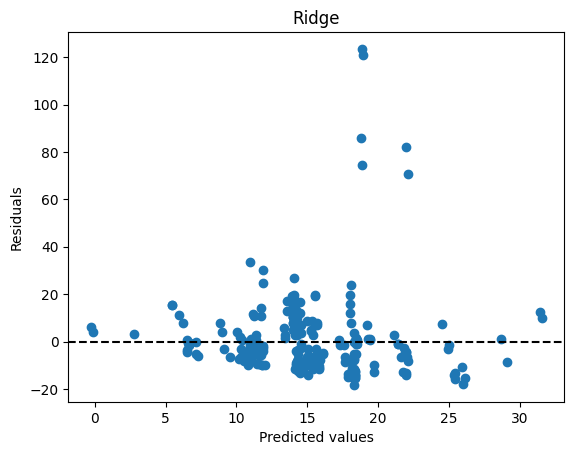

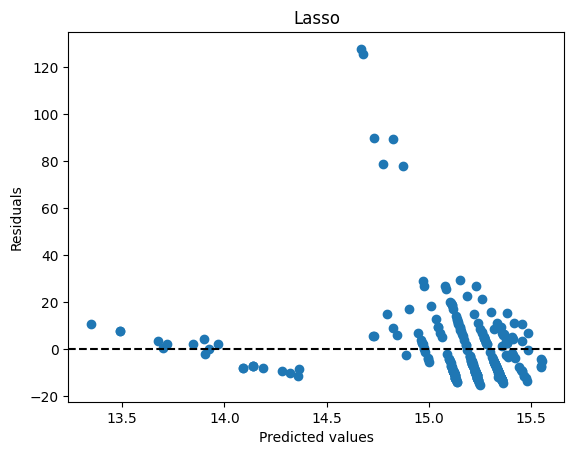

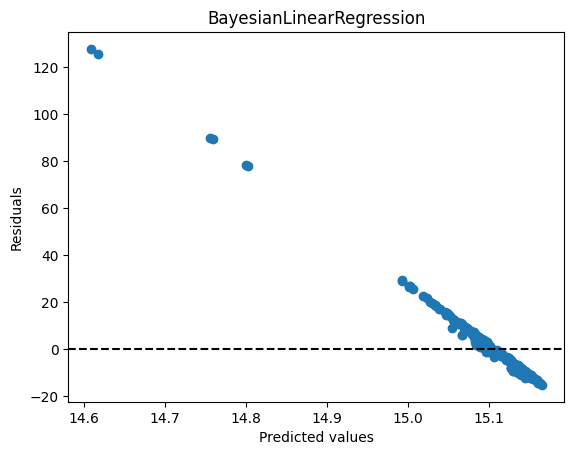

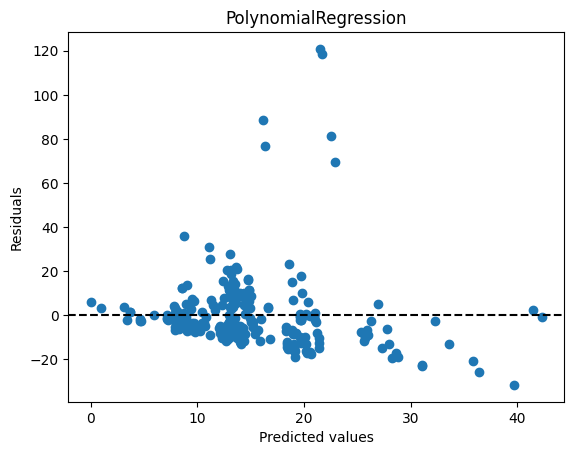

In [59]:
for model in df_results["Model"].unique():
    df_model = df_results[df_results["Model"] == model]
    y_pred = df_model["y_pred"].values[0]
    residuals = df_model["Residuals"].values[0]
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0.0, color="black", linestyle="--")
    plt.title(f"{model}")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.show()

#### Predicted vs Actual

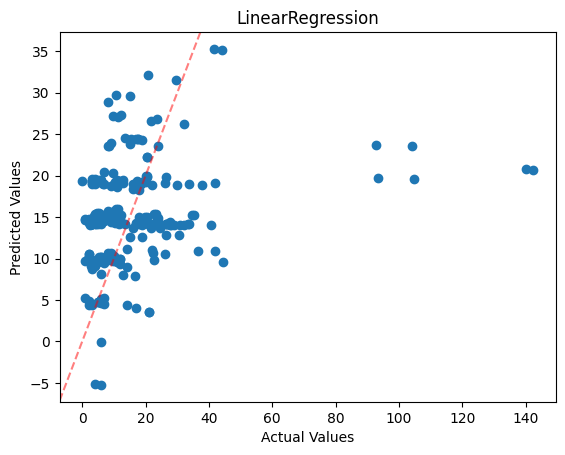

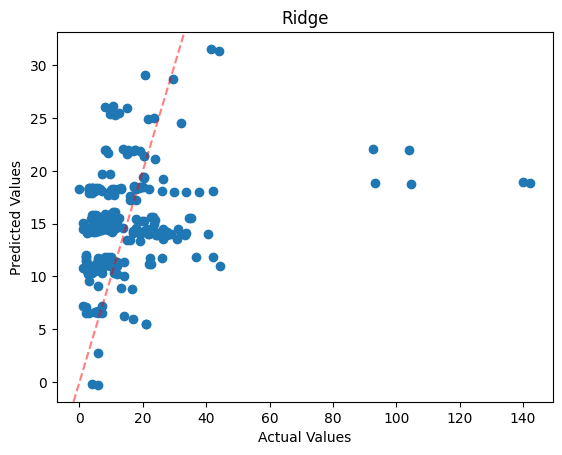

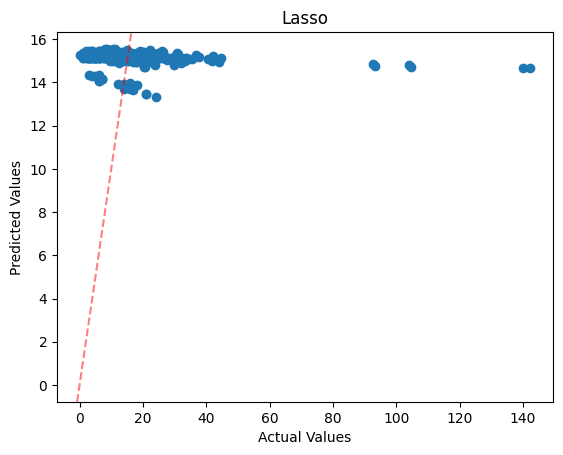

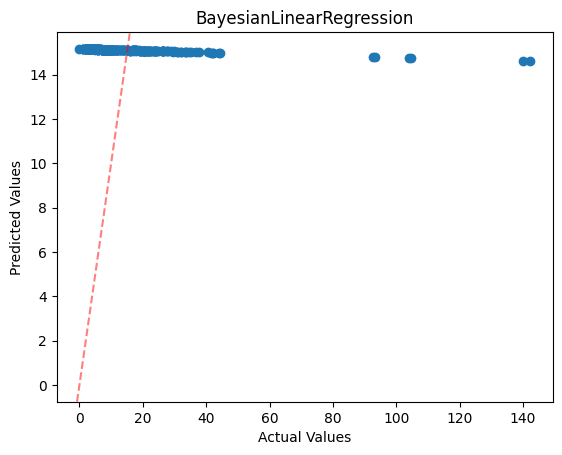

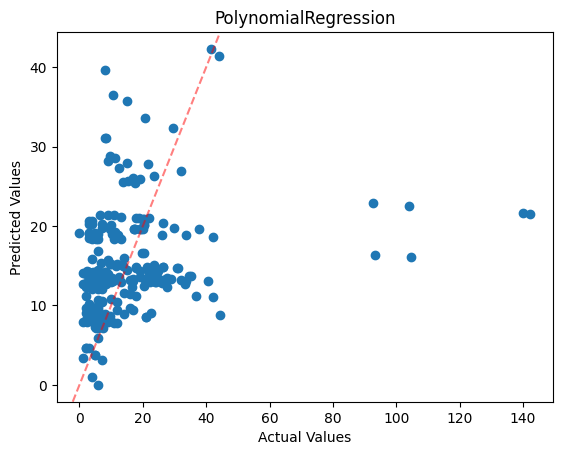

In [60]:
for model in df_results["Model"].unique():
    y_test = df_results[df_results["Model"] == model]["y_true"].values[0]
    y_pred = df_results[df_results["Model"] == model]["y_pred"].values[0]

    plt.scatter(y_test, y_pred)
    plt.axline([0, 0], [1, 1], color="red", linestyle="--", alpha=0.5)
    plt.title(f"{model}")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.show()